In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/chatbot-dataset-topical-chat/topical_chat.csv


In [2]:
df = pd.read_csv('../input/chatbot-dataset-topical-chat/topical_chat.csv')
df.head()

,conversation_id,message,sentiment
0,1,Are you a fan of Google or Microsoft?,Curious to dive deeper
1,1,Both are excellent technology they are helpfu...,Curious to dive deeper
2,1,"I'm not a huge fan of Google, but I use it a...",Curious to dive deeper
3,1,Google provides online related services and p...,Curious to dive deeper
4,1,"Yeah, their services are good. I'm just not a...",Curious to dive deeper


In [3]:
df.conversation_id.max

<bound method NDFrame._add_numeric_operations.<locals>.max of 0            1
1            1
2            1
3            1
4            1
          ... 
188373    8628
188374    8628
188375    8628
188376    8628
188377    8628
Name: conversation_id, Length: 188378, dtype: int64>

In [4]:
conv_N = 8628

## Assign speaker ID

Assign speaker ID to speakers: 
* A: the first speaker
* B: the second speaker

In [5]:
speaker_id = []
for conv in range(1, conv_N+1):
    df_conv = df.loc[df.conversation_id==conv].reset_index()
    for idx in df_conv.index:
        if idx%2 == 0:
            speaker_id.append(str(conv)+'A')
        else:
            speaker_id.append(str(conv)+'B')    

In [6]:
df["speaker_id"] = speaker_id

In [7]:
df.to_csv('/kaggle/working/df.csv',index=False)

## Analyze sentiment

In [8]:
sent_N = 8
sent_list = list(df.sentiment.unique())

In [9]:
sent_to_idx = dict(zip(sent_list,list(range(sent_N))))

In [10]:
df_speaker = df.loc[df["speaker_id"]=="1A"]

In [11]:
transition = np.zeros((sent_N, sent_N))

In [12]:
transition

array([[0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.]])

In [13]:
from tqdm import tqdm

In [14]:
df['sentiment_next'] = df.groupby('speaker_id')['sentiment'].shift(1)

In [15]:
df = df.dropna()
transition = np.zeros((sent_N, sent_N)) # reset transition matrix 
for idx in tqdm(range(df.shape[0])):    
    current_state = df.iloc[idx]["sentiment"]
    next_state = df.iloc[idx]["sentiment_next"]
    transition[sent_to_idx[current_state], sent_to_idx[next_state]] += 1

100%|██████████| 171122/171122 [00:38<00:00, 4442.15it/s]


## Plot the transition matrix

In [16]:
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<Axes: >

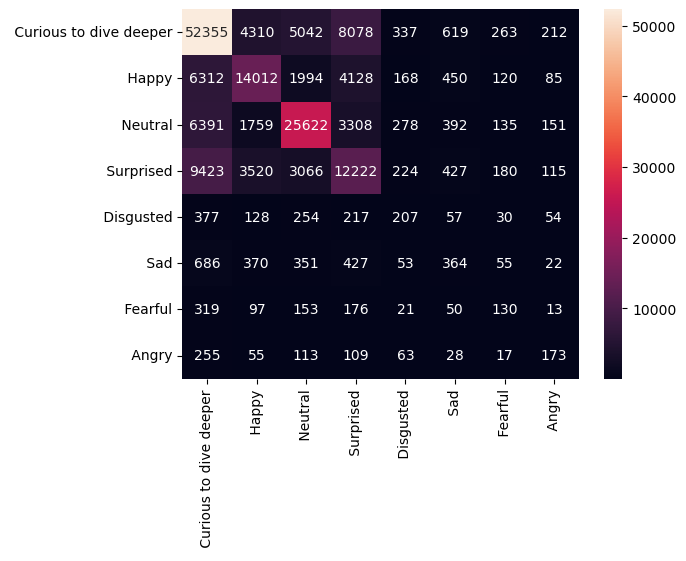

In [17]:
sns.heatmap(transition, annot = True, fmt = ".0f", 
            xticklabels = sent_list, yticklabels = sent_list)